##### All the header files of cv2,numpy and matplot

In [110]:
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

#### Load the images and change to grayscale

In [111]:
roadimage1 = cv2.imread("road1.png")
roadimage2 = cv2.imread("road2.png")
roadimage1 = cv2.cvtColor(roadimage1, cv2.COLOR_BGR2GRAY)
roadimage2 = cv2.cvtColor(roadimage2, cv2.COLOR_BGR2GRAY)

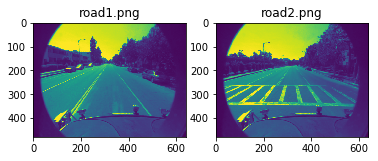

In [112]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("road1.png")
plt.imshow(roadimage1)
a=fig.add_subplot(1,2,2)
a.set_title("road2.png")
plt.imshow(roadimage2)

#### Function for 2D filtering, using same for all.
##### 1. Pad the image with zeros.
##### 2. Run the loop for each pixel inside kernel.
##### 3. Multiply the region of image around pixel and kernel.
##### 4.Rescale to 0 to 255.
##### 5.Convert to int8 and return

In [113]:
def filtering(image, kernel):
    height,width= image.shape
    K,_K = kernel.shape
    pad = (K - 1) / 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((height, width), dtype="float32")
    for y in np.arange(pad, height + pad):
        for x in np.arange(pad, width + pad):
            mul_image = image[y-pad:y+pad+1, x-pad:x+pad+1]
            res = (mul_image*kernel).sum()
            output[y-pad,x-pad] = res
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output    

#### Predefined function -
###### http://stackoverflow.com/questions/29731726/how-to-calculate-a-gaussian-kernel-matrix-efficiently-in-numpy

In [114]:
def gkern(kernlen, nsig):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

#### Now apply for image blurring, road1.png

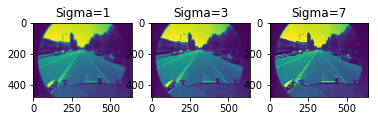

In [115]:
#Changing the sigma values
k1 = gkern(11, 1)
k2 = gkern(11, 3)
k3 = gkern(11, 7)



blur1 = filtering(roadimage1, k1)
blur2 = filtering(roadimage1, k2)
blur3 = filtering(roadimage1, k3)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("Sigma=1")
plt.imshow(blur1)
a=fig.add_subplot(1,3,2)
a.set_title("Sigma=3")
plt.imshow(blur2)
a=fig.add_subplot(1,3,3)
a.set_title("Sigma=7")
plt.imshow(blur3)

#### Image bluring, road2.png

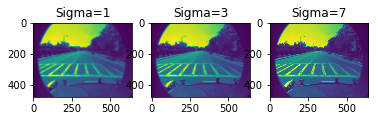

In [116]:
#Changing the sigma values
k1 = gkern(11, 1)
k2 = gkern(11, 3)
k3 = gkern(11, 7)



blur1 = filtering(roadimage2, k1)
blur2 = filtering(roadimage2, k2)
blur3 = filtering(roadimage2, k3)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("Sigma=1")
plt.imshow(blur1)
a=fig.add_subplot(1,3,2)
a.set_title("Sigma=3")
plt.imshow(blur2)
a=fig.add_subplot(1,3,3)
a.set_title("Sigma=7")
plt.imshow(blur3)

#### Sobel filter, hardcoded values

In [117]:
k1 = np.array(([[1  , 0 ,  -1],
      [2,   0,   -2],
      [1,   0,   -1]]),dtype="int");
k2 = np.array(([[2,   1,   0,   -1,  -2],
      [3,   2,   0,   -2,  -3],
      [4,   3,   0,   -3,  -4],
      [3,  2,  0,   -2,  -3],
      [2,   1,   0,   -1,  -2]]),dtype="int");
k3 = np.array(([[3,   2,   1,   0,   -1,  -2,  -3],
      [4,   3,   2,   0,   -2,  -3,  -4],
      [5,   4,   3,   0,   -3,  -4,  -5],
      [6,   5,   4,   0,   -4,  -5,  -6],
      [5,   4,   3,   0,   -3,  -4,  -5],
      [4,   3,   2,   0,   -2,  -3,  -4],
      [3,   2,   1,   0,   -1,  -2,  -3]]),dtype="int");

#### For road1.png

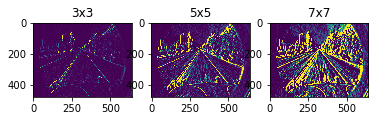

In [118]:
sobl1 = filtering(roadimage1, k1)
sobl2 = filtering(roadimage1, k2)
sobl3 = filtering(roadimage1, k3)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("3x3")
plt.imshow(sobl1)
a=fig.add_subplot(1,3,2)
a.set_title("5x5")
plt.imshow(sobl2)
a=fig.add_subplot(1,3,3)
a.set_title("7x7")
plt.imshow(sobl3)

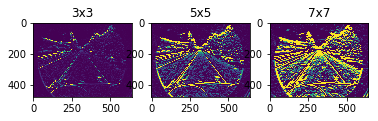

In [119]:
sobl1 = filtering(roadimage1, k1.T)
sobl2 = filtering(roadimage1, k2.T)
sobl3 = filtering(roadimage1, k3.T)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("3x3")
plt.imshow(sobl1)
a=fig.add_subplot(1,3,2)
a.set_title("5x5")
plt.imshow(sobl2)
a=fig.add_subplot(1,3,3)
a.set_title("7x7")
plt.imshow(sobl3)

#### For road2.png

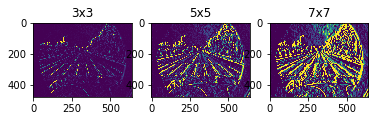

In [120]:
sobl1 = filtering(roadimage2, k1)
sobl2 = filtering(roadimage2, k2)
sobl3 = filtering(roadimage2, k3)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("3x3")
plt.imshow(sobl1)
a=fig.add_subplot(1,3,2)
a.set_title("5x5")
plt.imshow(sobl2)
a=fig.add_subplot(1,3,3)
a.set_title("7x7")
plt.imshow(sobl3)

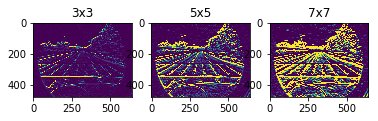

In [121]:
sobl1 = filtering(roadimage2, k1.T)
sobl2 = filtering(roadimage2, k2.T)
sobl3 = filtering(roadimage2, k3.T)


fig = plt.figure()
a=fig.add_subplot(1,3,1)
a.set_title("3x3")
plt.imshow(sobl1)
a=fig.add_subplot(1,3,2)
a.set_title("5x5")
plt.imshow(sobl2)
a=fig.add_subplot(1,3,3)
a.set_title("7x7")
plt.imshow(sobl3)

#### Image sharpening
##### 1. Used k1, enhance the central pixel
##### 2. Used k2, degrade central pixel
http://www.sfu.ca/geog/geog452spring01/group2/edge_enh_filter.html

In [122]:
k1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]);
k2 = np.array([[1,1,1], [1,-7,1], [1,1,1]]);

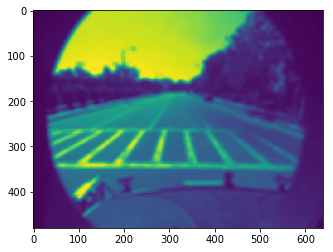

In [124]:
plt.imshow(blur1)
#Blured image road1.png

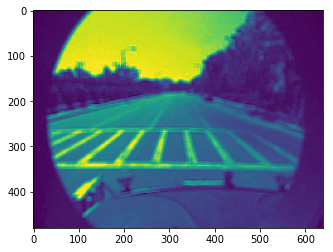

In [125]:
blur1 = filtering(blur1, k1)
plt.imshow(blur1)

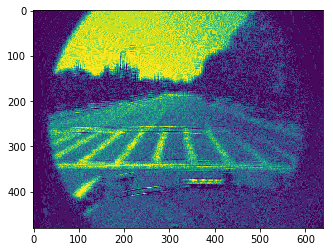

In [126]:
blur2 = filtering(blur1, k2)
plt.imshow(blur2)